# Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Hypothesis Generation : The location and size of the Big Mart store have an impact on the overall sales performance and customer footfall

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

# Loading Packages and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df_train= pd.read_csv(r"C:\Users\Shubham\Desktop\technocolabs Software\train.csv")

In [64]:
df_test= pd.read_csv(r"C:\Users\Shubham\Desktop\technocolabs Software\test.csv")

# Data Structure and Content

In [10]:
df_train 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data information 

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [14]:
df_test.shape

(5681, 11)

# checking null values 

In [15]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [17]:
df_train.shape

(8523, 12)

In [18]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [21]:
df_train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

# missing data 

In [22]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [23]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df_train["Outlet_Size"].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [25]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
df_train["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [27]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)

In [28]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
#droping out unwanted data
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [30]:
df_train 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


In [32]:
#check for duplicate data
duplicate = df_train.duplicated()
print(duplicate.sum())
df_train[duplicate]

0


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [33]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<function matplotlib.pyplot.show(close=None, block=None)>

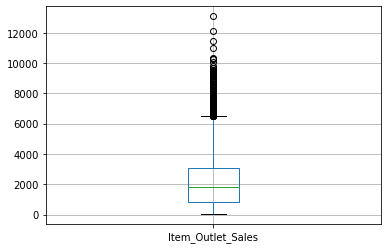

In [34]:
#Handling Outlier
df_train.boxplot('Item_Outlet_Sales')            #(column='Item_Weight')
plt.show

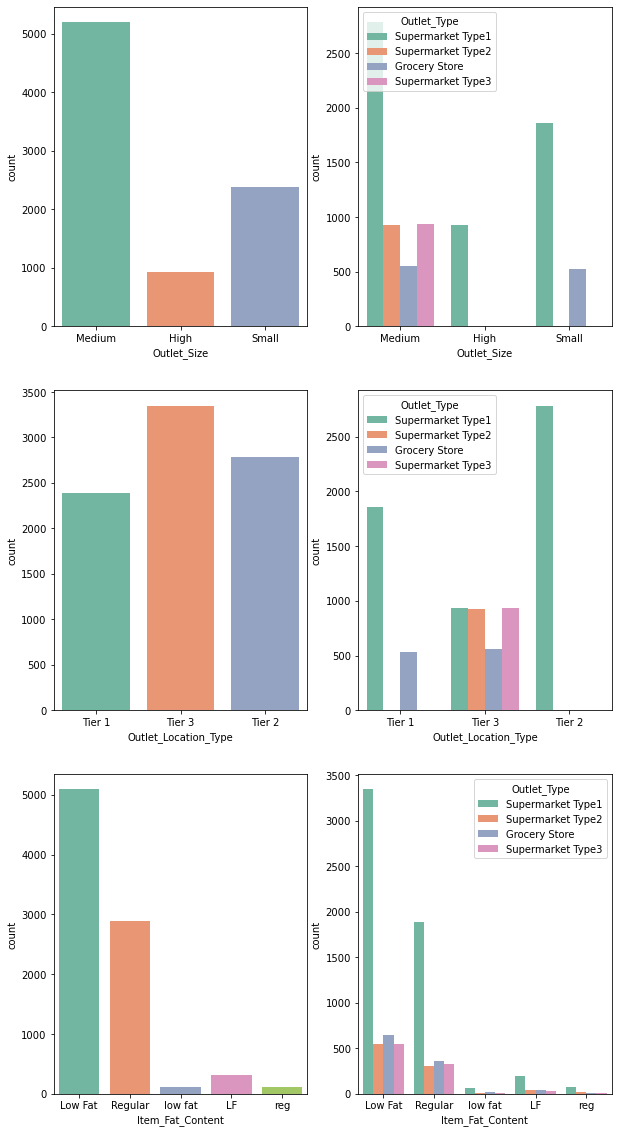

In [35]:
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data = df_train,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=df_train,palette='Set2')
    i+=1

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

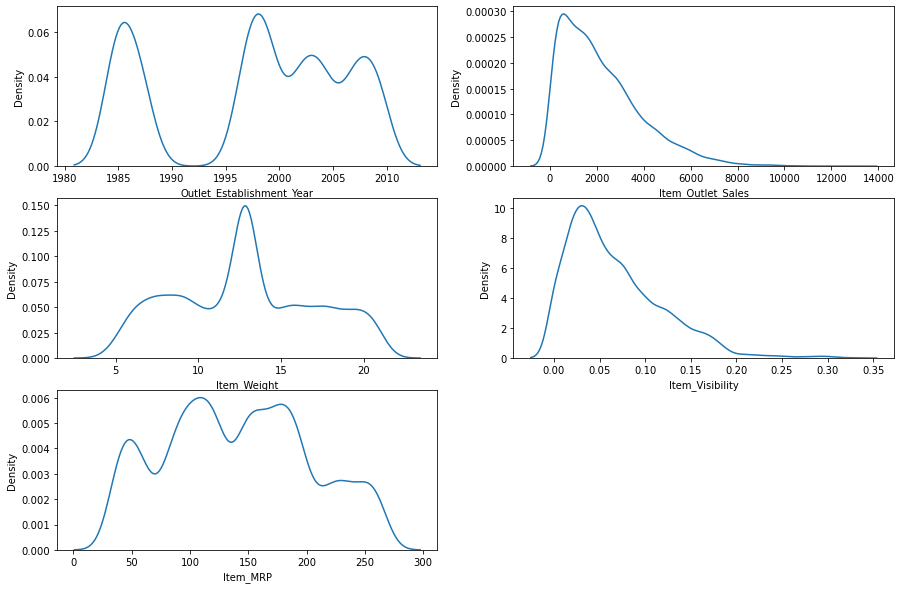

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=df_train,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=df_train,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=df_train,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=df_train,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=df_train,palette='Set2')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

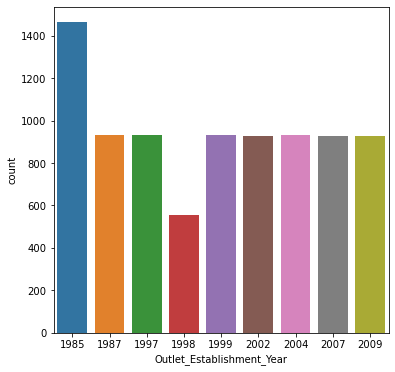

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

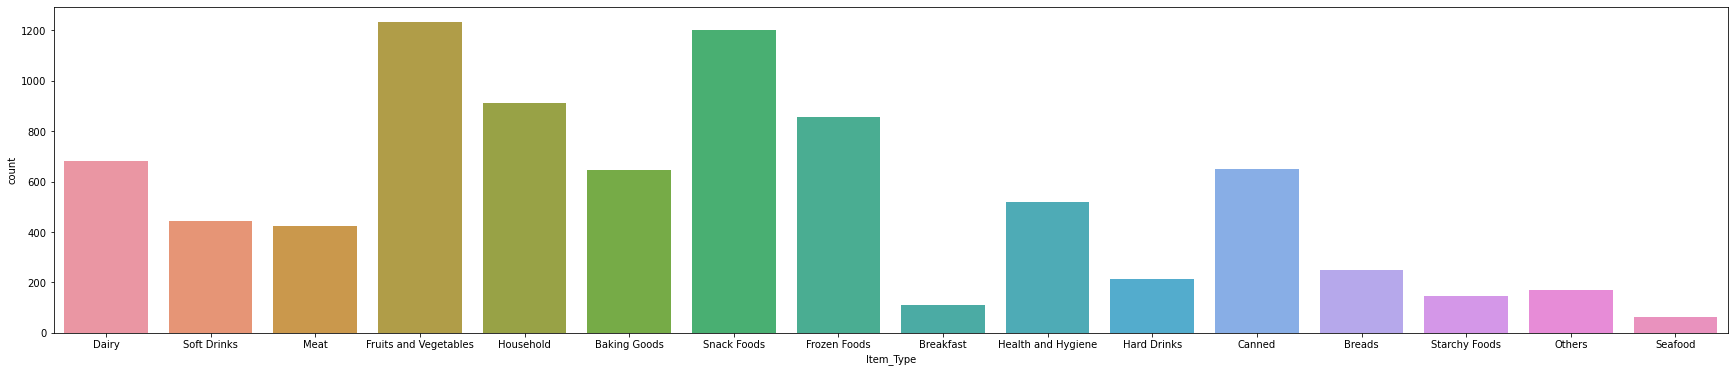

In [38]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df_train)

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


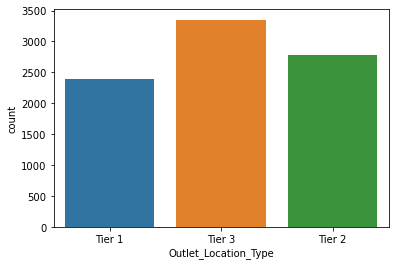

In [39]:
sns.countplot(df_train["Outlet_Location_Type"])
plt.show()

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


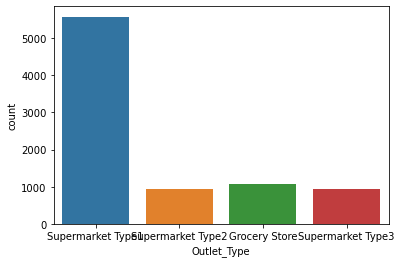

In [40]:
sns.countplot(df_train["Outlet_Type"])
plt.show()

# Bivariate Analysis

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


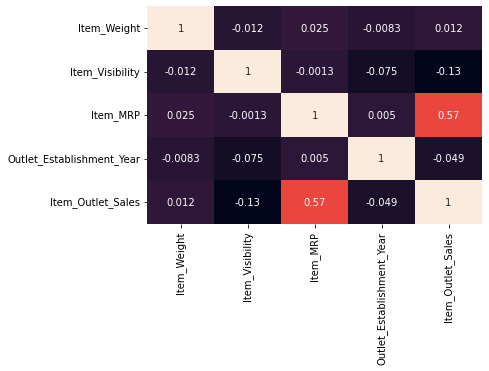

In [41]:
corr=df_train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

# Preprocessing Task before Model Building
 

# Label Encoding

In [42]:
# Import libraries
import numpy as np
import pandas as pd


df_train['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [43]:
df_train['Item_Type'].unique()


array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:

df_train['Outlet_Size'].unique()


array(['Medium', 'High', 'Small'], dtype=object)

In [45]:

df_train['Outlet_Location_Type'].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [46]:

df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [47]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_train['Item_Fat_Content']= label_encoder.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Fat_Content'].unique()


array([1, 2, 3, 0, 4])

In [48]:

df_train['Item_Type']= label_encoder.fit_transform(df_train['Item_Type'])

df_train['Item_Type'].unique()


array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [49]:

df_train['Outlet_Size']= label_encoder.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Size'].unique()

array([1, 0, 2])

In [50]:

df_train['Outlet_Location_Type']= label_encoder.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [51]:

df_train['Outlet_Type']= label_encoder.fit_transform(df_train['Outlet_Type'])

df_train['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [52]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


# Splitting our data into train and test

In [53]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
Y=df_train['Item_Outlet_Sales']


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Standarization

In [55]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [56]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)


In [57]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [58]:
X_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [59]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [60]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Model Building

In [65]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [66]:
lr.fit(X_train_std , Y_train)

LinearRegression()

In [67]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,1,1,1
6954,7.55,1,0.027225,3,152.9340,2002,1,1,1


In [68]:
Y_pred_lr=lr.predict(X_test_std)

In [73]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [74]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [75]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809338
880.9999067141265
1162.4412660891483



# RandomForest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [77]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [78]:
Y_pred_rf= rf.predict(X_test_std)

In [79]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5495854472631849
781.1447270497359
1107.9458200989188
